# I. Scenario

I work in the HR consultant field. I, as a data scientist, am expected to create a web-based application where the application will be used to predict whether a worker will be loyal or not to the company. I will be given training data and test data for this project. After I have completed this programmeme, it is hoped that this programmeme can help companies predict whether an employee will be loyal or not.

Link Data Set  : https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists

Link Hugging Face : https://huggingface.co/spaces/Harari59/HRAnalytics

## Obejctive

1. Be able to determine columns that have an important role in modelling (feature selection).

2. Be able to determine the best model to predict loyal or disloyal employees.

3. Be able to explain the advantages and disadvantages of the model used.

4. Be able to provide business advice to client companies based on this data set.

# II. Import Library 

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kendalltau
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from feature_engine.outliers import Winsorizer
from imblearn.over_sampling import SMOTENC
from sklearn.impute import SimpleImputer

# Modeling
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,f1_score, accuracy_score, precision_score, recall_score,make_scorer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Model Saving
import pickle
import warnings

warnings.filterwarnings('ignore')




# III. Data Loading 

## Data Information

In [2]:
df =  pd.read_csv('aug_train.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


Columns Description 

- enrollee_id : Unique ID for candidate

- city: City code

- city_ development _index : Developement index of the city (scaled)

- gender: Gender of candidate

- relevent_experience: Relevant experience of candidate

- enrolled_university: Type of University course enrolled if any

- education_level: Education level of candidate

- major_discipline :Education major discipline of candidate

- experience: Candidate total experience in years

- company_size: No of employees in current employer's company

- company_type : Type of current employer

- last_new_job: Difference in years between previous job and current job

- training_hours: training hours completed

- target: 0 – Not looking for job change, 1 – Looking for a job change

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

There are missing values in the gender, enrolled university, education_level, major_discipline, experience, company_size, and last_new_job columns.

In [5]:
df.duplicated().sum()

0

There are no duplicate data in this data set

In [6]:
df_backup = df.copy()

## Cardinality Checking 

In [7]:
df.columns 

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [8]:
cek_cardinality = ['enrollee_id', 'city', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']

In [ ]:
for i in cek_cardinality :
    a = df[i].nunique()

    print('The number of variations in a column',i ,'is ', a)

Jumlah variasi dalam kolom enrollee_id ada  19158
Jumlah variasi dalam kolom city ada  123
Jumlah variasi dalam kolom gender ada  3
Jumlah variasi dalam kolom relevent_experience ada  2
Jumlah variasi dalam kolom enrolled_university ada  3
Jumlah variasi dalam kolom education_level ada  5
Jumlah variasi dalam kolom major_discipline ada  6
Jumlah variasi dalam kolom experience ada  22
Jumlah variasi dalam kolom company_size ada  8
Jumlah variasi dalam kolom company_type ada  6
Jumlah variasi dalam kolom last_new_job ada  6


Analysis :
- The enrollee_id column and city column have a very large number of variations; therefore, these two columns will be deleted to make the process easier.

- In the experience column, there are 22 variations. Therefore, it is best to handle cardinality in this column.

In [10]:
df_cardinal = df.drop(['enrollee_id','city'],axis=1)
df_cardinal 

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [11]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

The experience column will be divided into several categories as follows:
- Junior: < 5 years
- Intermediate: 6-10 Years
- Senior: 11-15 Years
- Veteran: 15> Years

In [12]:
def klasifikasi_experience(experience):
    if pd.isna(experience):
        pass
    elif experience in ['<1','1', '2', '3','4', '5']:
        return 'Junior'
    elif experience in ['6', '7', '8', '9', '10']:
        return 'Intermediate'
    elif experience in ['11','12','13' ,'14','15']:
        return 'Senior'
    else:
        return 'Veteran'

In [13]:
df_cardinal['experience_category'] = df_cardinal['experience'].apply(klasifikasi_experience)
df_cardinal['experience_category']

0        Veteran
1         Senior
2         Junior
3         Junior
4        Veteran
          ...   
19153     Senior
19154     Senior
19155    Veteran
19156     Junior
19157     Junior
Name: experience_category, Length: 19158, dtype: object

In [14]:
df_cardinal['experience_category'].unique()

array(['Veteran', 'Senior', 'Junior', 'Intermediate', None], dtype=object)

Cardinality has been resolved by dividing the experience column into experience categories

In [15]:
df_ready = df_cardinal.drop(['experience'],axis=1)
df_ready

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,training_hours,target,experience_category
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,NaN,1,36,1.0,Veteran
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,>4,47,0.0,Senior
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,NaN,NaN,never,83,0.0,Junior
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,NaN,Pvt Ltd,never,52,1.0,Junior
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,50-99,Funded Startup,4,8,0.0,Veteran
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,NaN,NaN,1,42,1.0,Senior
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,NaN,4,52,1.0,Senior
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,4,44,0.0,Veteran
19156,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,500-999,Pvt Ltd,2,97,0.0,Junior


# IV. EDA

In [16]:
kolom_numerik = ['city_development_index','training_hours','target']
kolom_kategori = [ 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'company_size', 'company_type', 'last_new_job',  'experience_category']

In [17]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  14650 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     18772 non-null  object 
 4   education_level         18698 non-null  object 
 5   major_discipline        16345 non-null  object 
 6   company_size            13220 non-null  object 
 7   company_type            13018 non-null  object 
 8   last_new_job            18735 non-null  object 
 9   training_hours          19158 non-null  int64  
 10  target                  19158 non-null  float64
 11  experience_category     19093 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.8+ MB


## Heatmap 

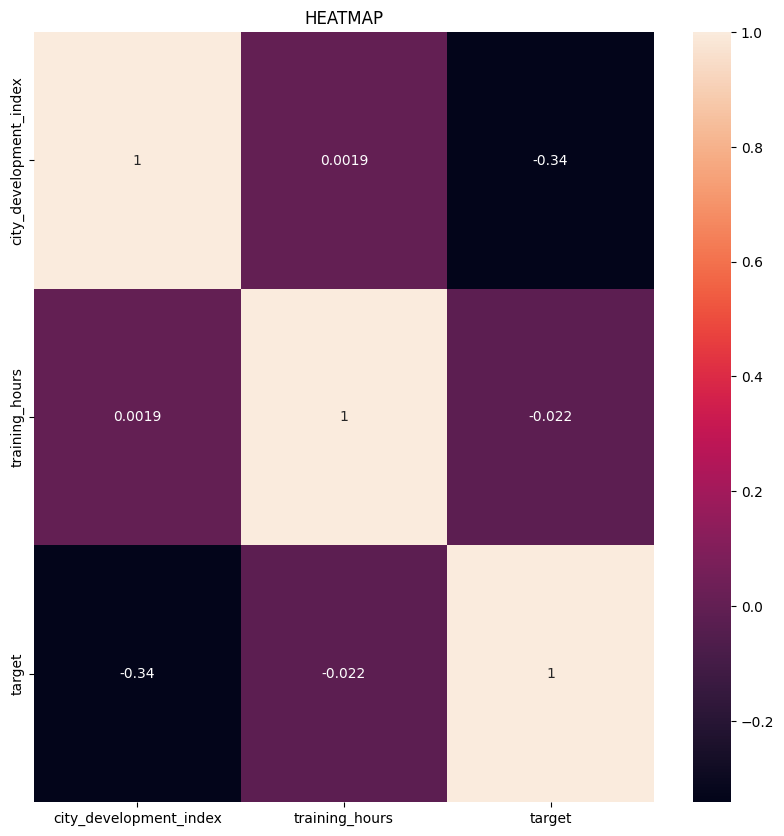

In [18]:
plt.figure(figsize = (10,10))
sns.heatmap(df_ready[kolom_numerik].corr(),annot=True)
plt.title('HEATMAP')
plt.show()

From the heatmap experiment, the column that has a correlation value with the target is city_development_index. With a correlation value of -0.34

## Distribution of the Number of Categorical Data on the Target

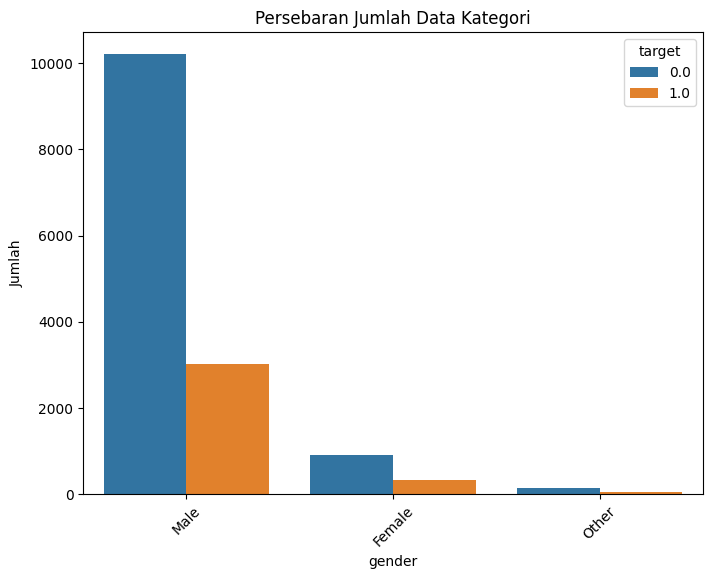

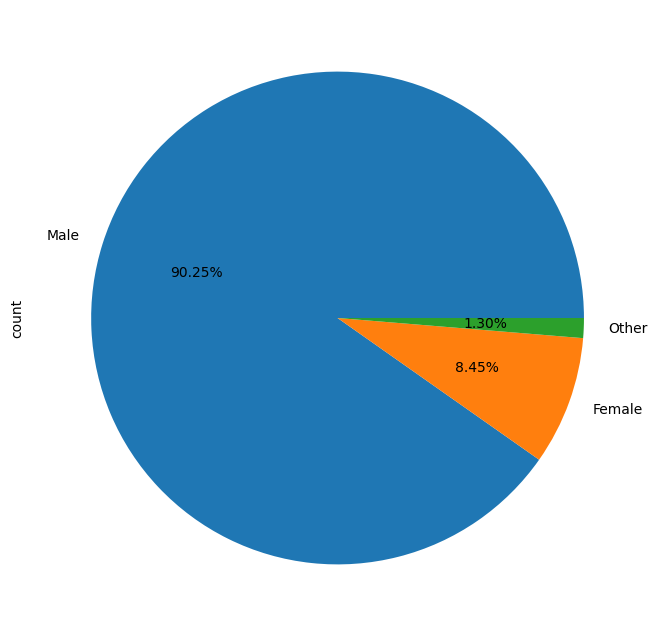

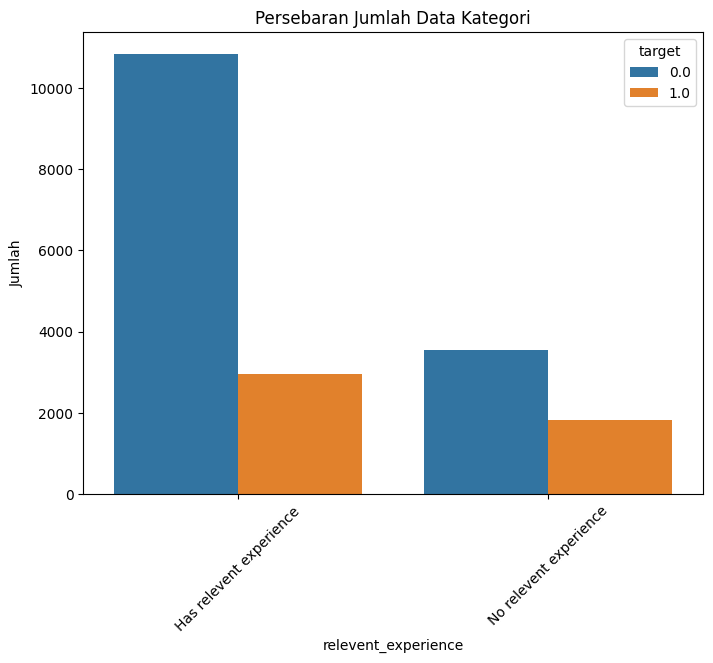

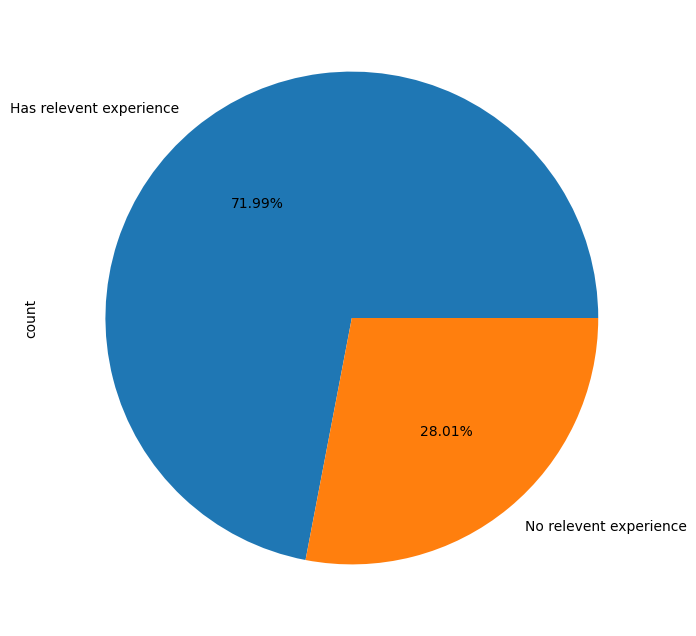

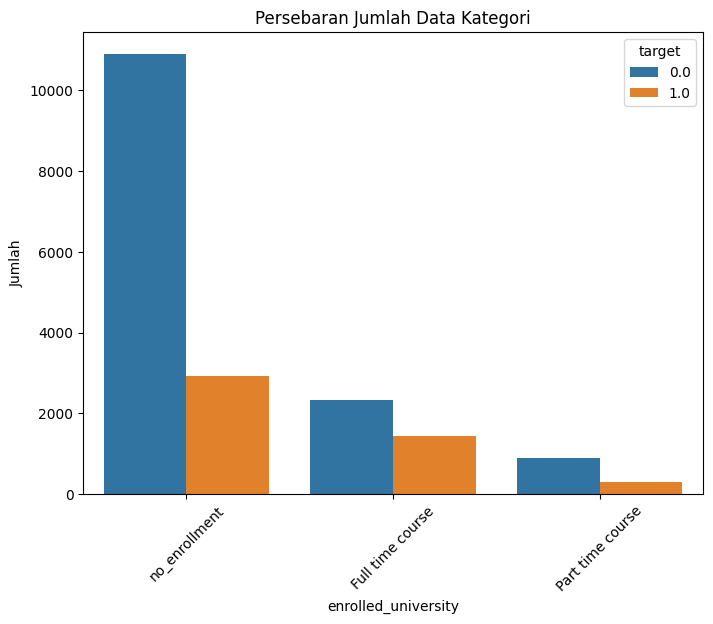

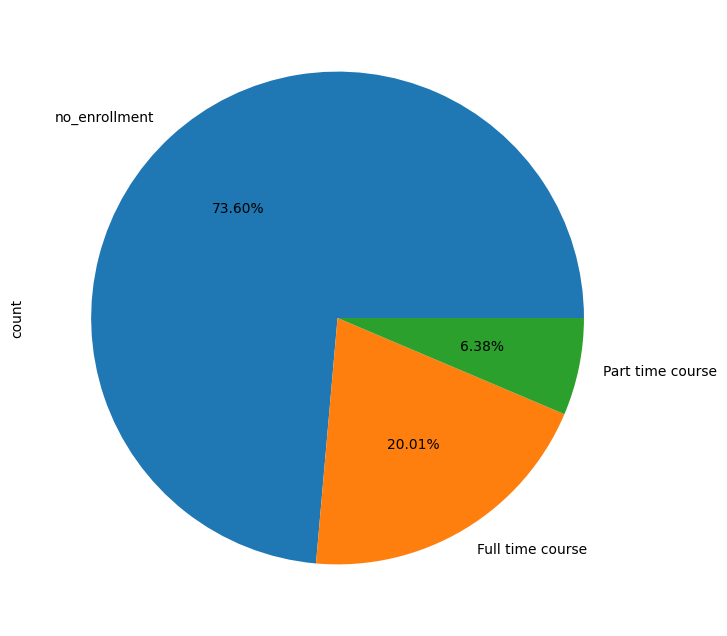

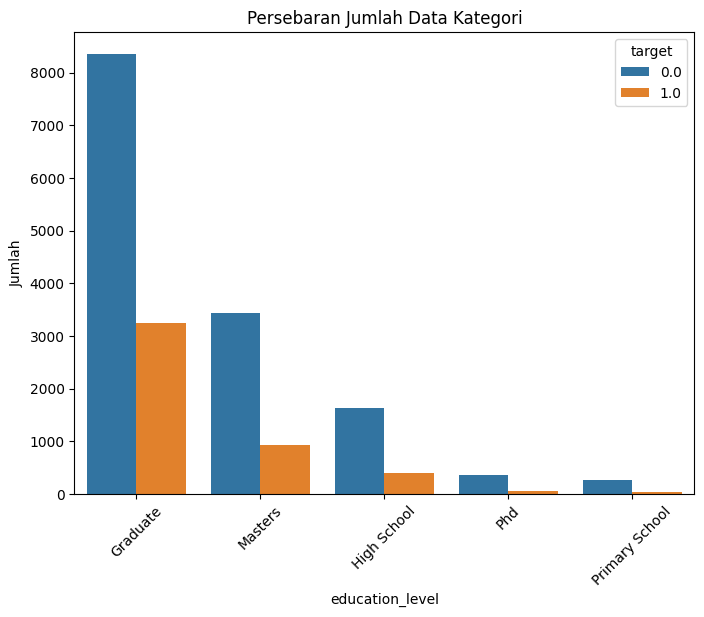

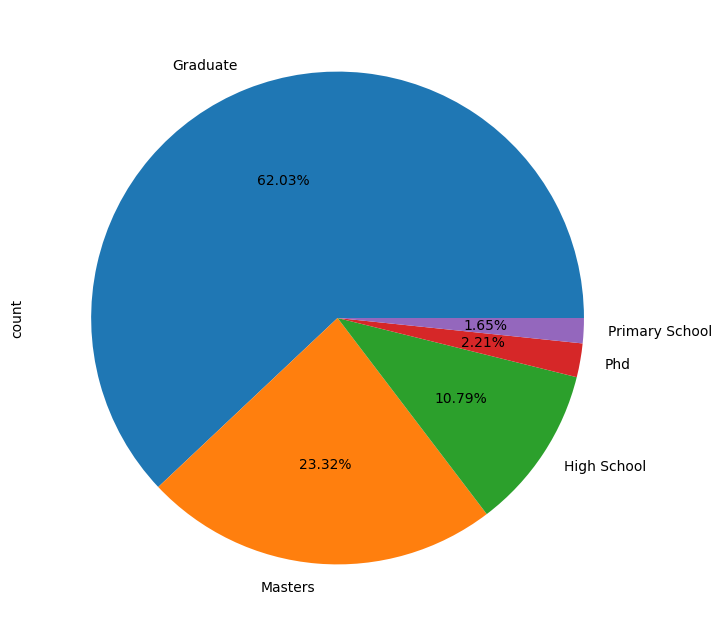

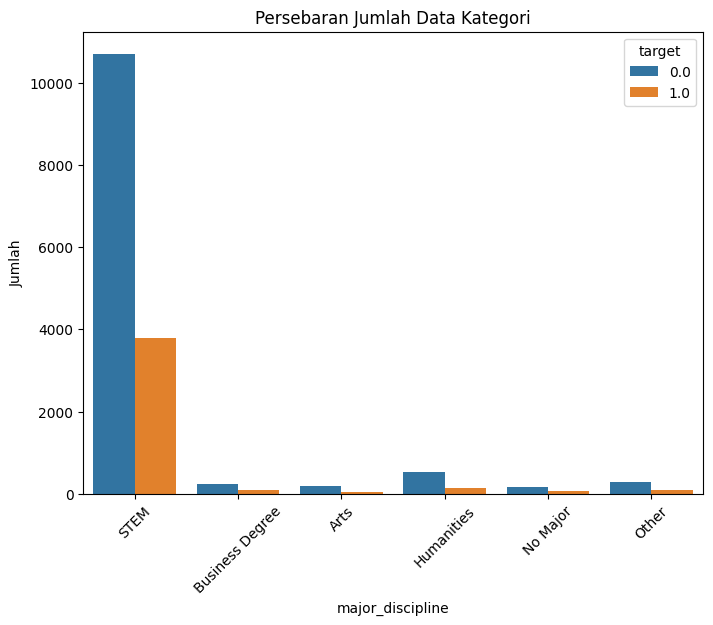

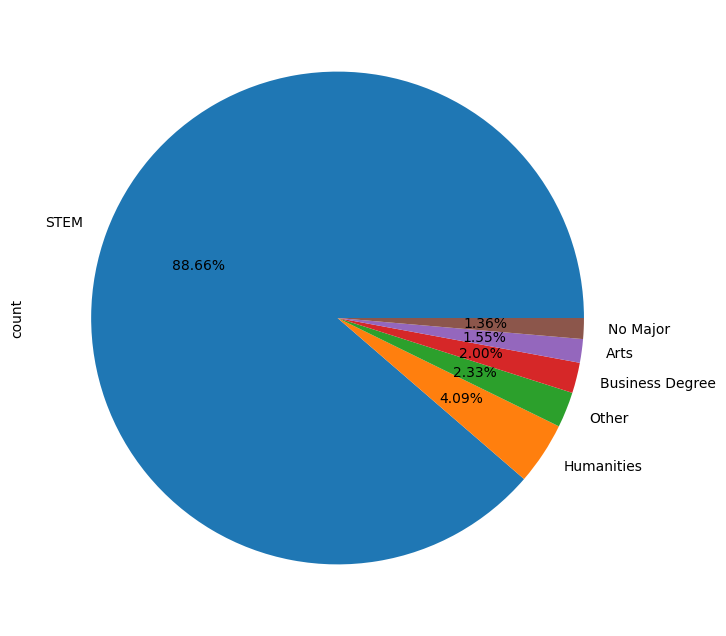

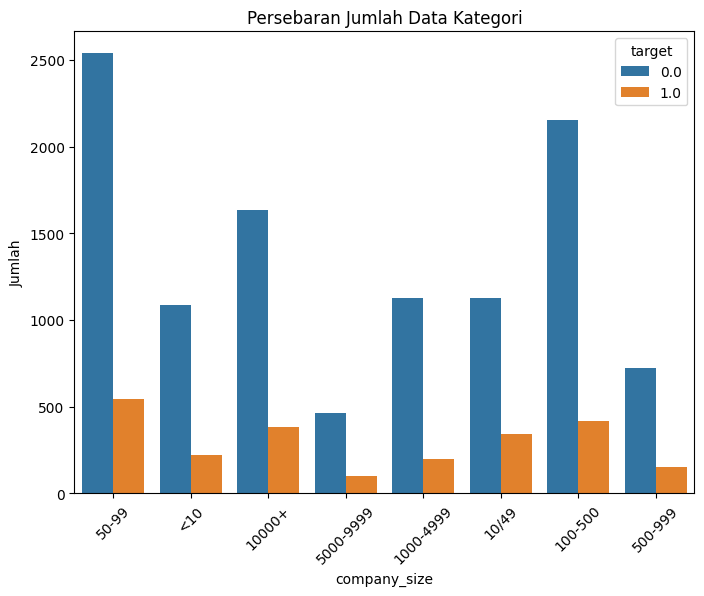

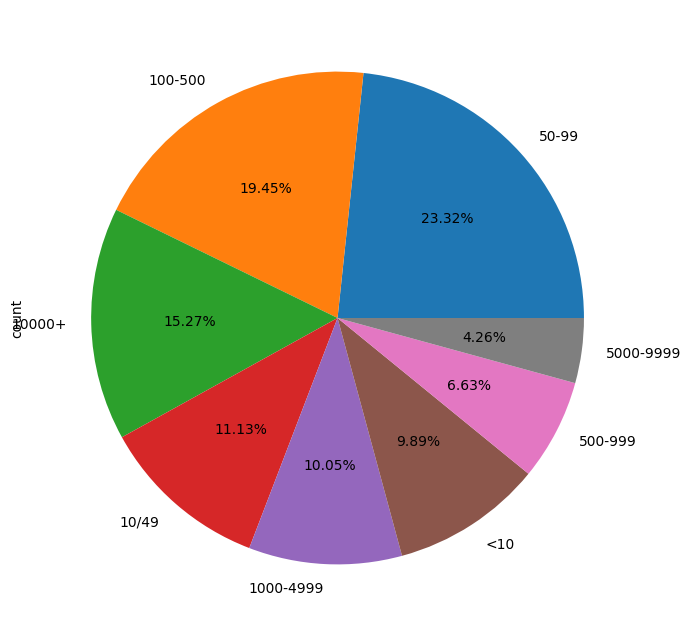

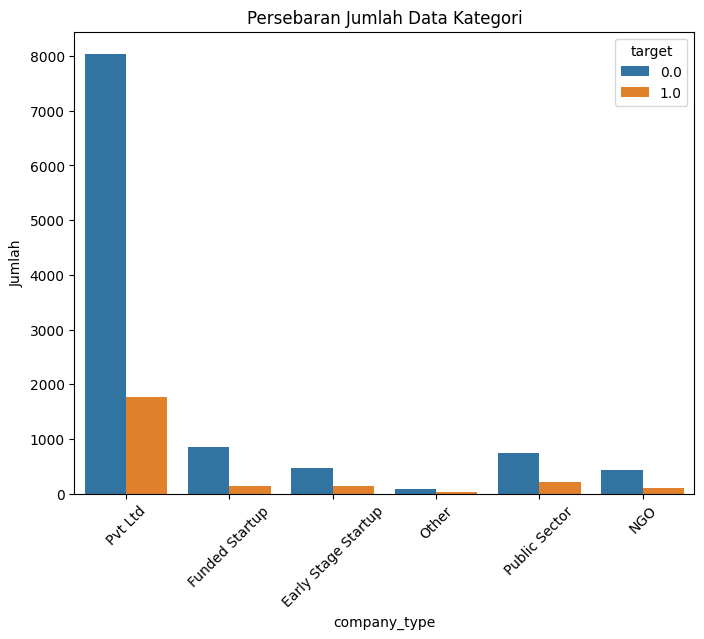

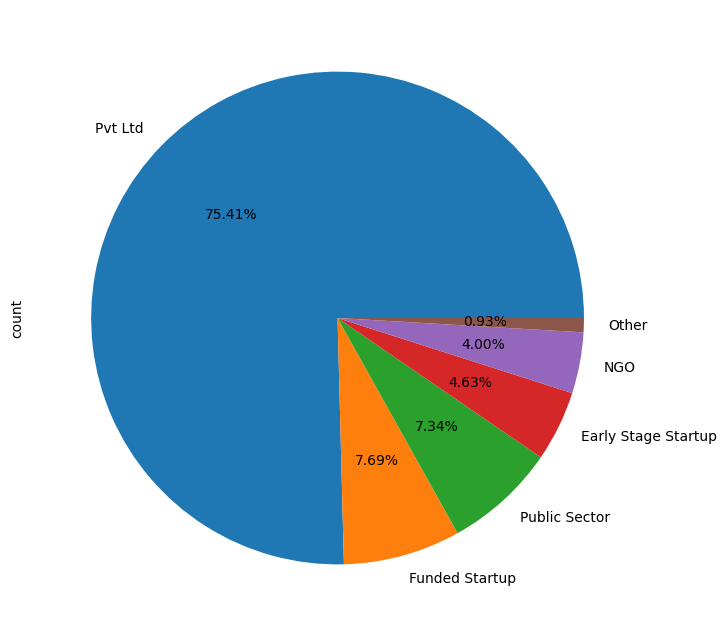

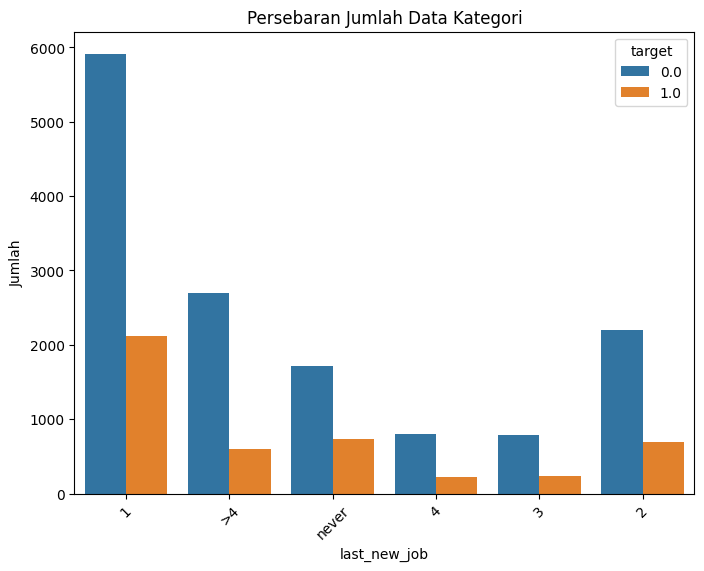

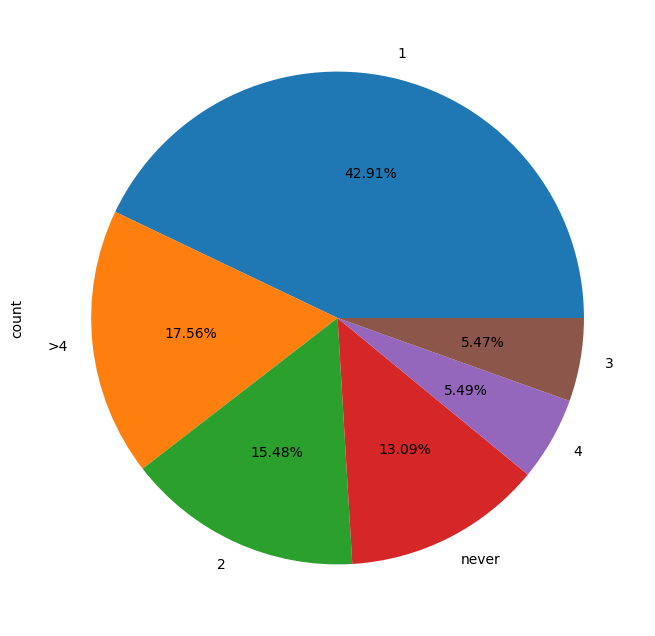

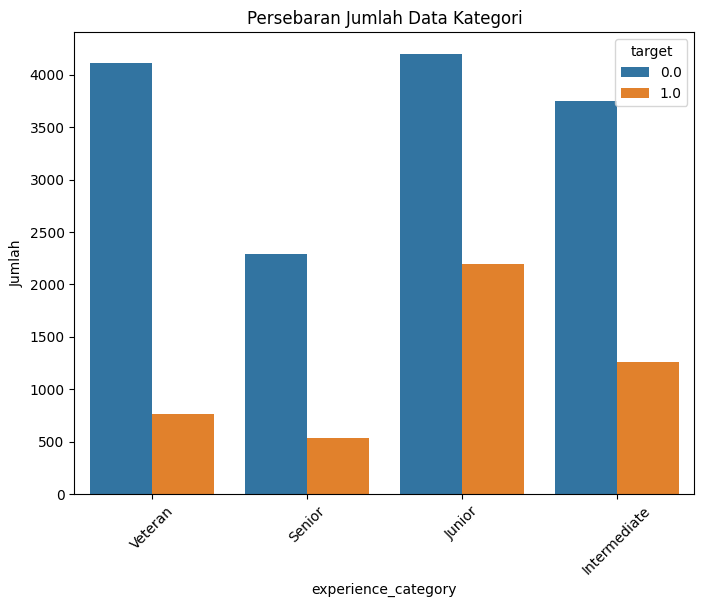

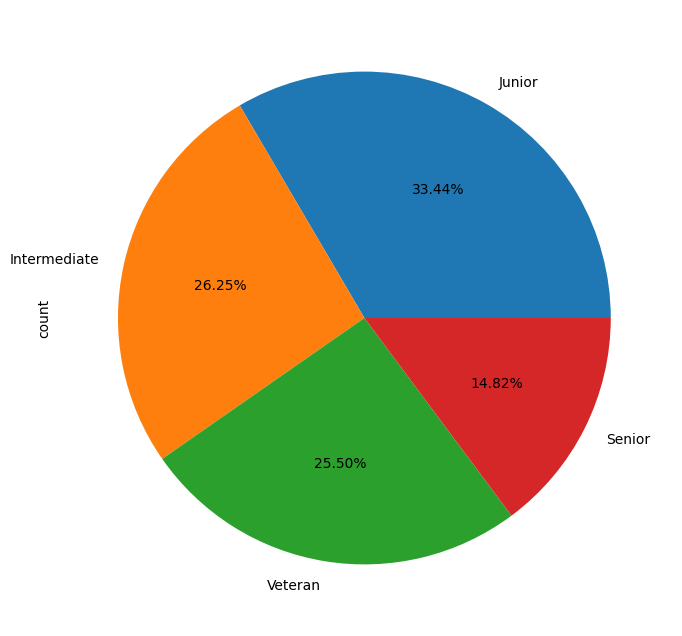

In [105]:
for i in kolom_kategori:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_ready, x=i, hue='target')
    plt.title('Persebaran Jumlah Data Kategori')
    plt.xlabel(i)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

    fig,ax1 = plt.subplots(figsize=(8,8))

    df_ready[i].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
    plt.show()

In the category column there are several insights that can be found:

- Based on gender, it can be seen that the number of men who want to resign is greater than the number of female workers. However, this could be due to the fact that there are also more men than women in this data set.

- In the relevant experience column, it can be seen that the number of workers who have relevant experience resigns more than workers who do not have relevant experience. However, this can also happen because the number of workers with relevant experience is greater than the number of workers who do not have relevant experience.

- In the university enrollment column, it can be seen that the number of workers with no enrollment is the largest type of worker who wants to resign. However, this could also be due to the fact that the number of workers included in the no enrollment type of worker is the type of worker with the largest number.

- In the education level column, it can be seen that the number of workers with graduate education is the type of worker who most wants to resign. This could indicate that workers with bachelor's degrees sometimes want to try to seek wider opportunities than workers with other levels of education.

- In the major discipline, it can be seen that the number of workers with the STEM major discipline is the type of worker who most wants to resign. However, this could also be due to the fact that in this data set the largest number are workers majoring in STEM.

- In the company size column, the workers who most want to resign are workers who work in companies with 50-99 employees. This could indicate that companies with a small number of employees like this are more likely to lose their workers. However, this can also happen because the largest number of company sizes in this dataset are companies with 50-99 employees.

- In the company type column which has the most employees wanting to resign is the PVP type of company. However, this could be due to the fact that the largest amount of data on company types is PVP type companies.

- Based on the length of time they have worked before the company, the employees who most want to resign are employees who have worked at their previous place for 1 year. This may happen because new employees sometimes cannot be loyal to the new company and also require adaptation to the company.

- Based on experience, the employees who most want to resign are employees with junior experience levels. This may happen because employees at junior levels may still be tempted by higher salaries at other companies.

From the EDA above, several suggestions for companies can be drawn:
- More attention can be paid to junior level employees so that employees/workers at this level can feel more at home in the company and become loyal to the company.

- For employees who have just joined (under 1 year) you should pay more attention because these new workers need a comfortable working environment. By providing good treatment to new workers, it is hoped that these new workers will feel at home and become loyal workers.

- Employees with a bachelor's level of education also need to pay attention, because sometimes employees with a bachelor's level of education often want to try looking for another job. By providing good treatment to employees at this level, it is hoped that graduate workers will feel more at home and become loyal.

- For small companies, you should be more careful because many workers want to resign from this type of company with a small number of employees.

## Percentage of workers who want to resign

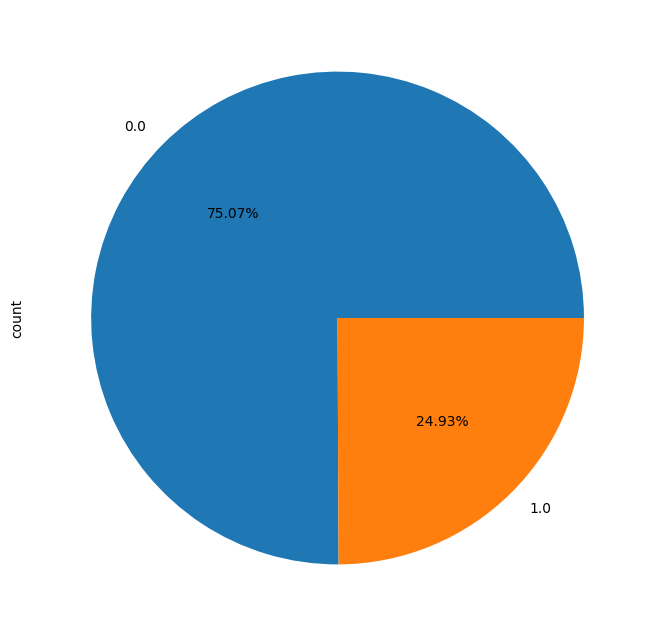

In [20]:
fig,ax1 = plt.subplots(figsize=(8,8))

df_cardinal['target'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

There are 25% of workers who want to resign or look for a new job, while there are 75% of loyal workers. It can be seen that there is an imbalance in this target; therefore, imbalance handling needs to be carried out in the next process.

# V. Feature Engineering 

In [21]:
col_num = ['city_development_index', 'training_hours']
col_cat = ['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_size',
 'company_type',
 'last_new_job',
 'experience_category']

## Feature Selection

In [22]:
korelasi_num = []
for i in col_num:
    correlation, p_value = kendalltau(df_ready['target'], df_ready[i])


    if p_value <0.05 :
        korelasi_num.append(i)
print('Data yang memiliki korelasi dengan target adalah', korelasi_num)

Data yang memiliki korelasi dengan target adalah ['city_development_index']


In [23]:
korelasi_cat = []
for i in col_cat :
    tabel_korelasi = pd.crosstab(df_ready['target'], df_ready[i])
    tes_korelasi = stats.chi2_contingency(tabel_korelasi)
    pval = tes_korelasi.pvalue
    corr = tes_korelasi.statistic
    
    if pval < 0.05 :
        korelasi_cat.append(i)
        print(i,'pvalue ;',pval,'nilai korelasi :',corr)

print('')
print('Data yang memiliki korelasi dengan target month adalah', korelasi_cat)




gender pvalue ; 0.010877151633874342 nilai korelasi : 9.0421817403733
relevent_experience pvalue ; 1.5006628411178982e-70 nilai korelasi : 315.33857672021657
enrolled_university pvalue ; 1.4514211750080545e-99 nilai korelasi : 455.166762018575
education_level pvalue ; 8.949047910389103e-35 nilai korelasi : 165.65538908719
major_discipline pvalue ; 0.03205735800130323 nilai korelasi : 12.207121063439173
company_size pvalue ; 1.0781332047560822e-07 nilai korelasi : 45.53175529315902
company_type pvalue ; 1.4803202994777527e-06 nilai korelasi : 35.03547546070746
last_new_job pvalue ; 7.015169967001471e-27 nilai korelasi : 132.49948396906083
experience_category pvalue ; 1.0218605793868002e-124 nilai korelasi : 576.9074098081906

Data yang memiliki korelasi dengan target month adalah ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type', 'last_new_job', 'experience_category']


In [104]:
korelasi_cat

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_size',
 'company_type',
 'last_new_job',
 'experience_category']

So in this feature selection, the features that will be used are:
- 'city_development_index'
- 'gender'
- 'relevent_experience'
- 'enrolled_university'
- 'education_level'
- 'major_discipline'
- 'company_size'
- 'company_type'
- 'last_new_job'
- 'experience_category'

In [24]:
# Data fix setelah feature
df_fix = pd.concat([df_ready[korelasi_cat],df_ready[korelasi_num],df_ready['target']],axis=1)
df_fix

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,experience_category,city_development_index,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,NaN,1,Veteran,0.920,1.0
1,Male,No relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,>4,Senior,0.776,0.0
2,NaN,No relevent experience,Full time course,Graduate,STEM,NaN,NaN,never,Junior,0.624,0.0
3,NaN,No relevent experience,NaN,Graduate,Business Degree,NaN,Pvt Ltd,never,Junior,0.789,1.0
4,Male,Has relevent experience,no_enrollment,Masters,STEM,50-99,Funded Startup,4,Veteran,0.767,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19153,Male,No relevent experience,no_enrollment,Graduate,Humanities,NaN,NaN,1,Senior,0.878,1.0
19154,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,NaN,4,Senior,0.920,1.0
19155,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,4,Veteran,0.920,0.0
19156,Male,Has relevent experience,no_enrollment,High School,NaN,500-999,Pvt Ltd,2,Junior,0.802,0.0


## Spliting Data

In [25]:
# Separating targets from features

x = df_fix.drop('target',axis=1)
y = df_fix['target']

In [26]:
# Divide data into train data and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 66,stratify=y)

In [27]:
x_train_num = x_train[korelasi_num]
x_train_cat = x_train[korelasi_cat]

x_test_num = x_test[korelasi_num]
x_test_cat = x_test[korelasi_cat]

## Cek data numerik 

In [28]:
# Cek kenormalan data train menggunakan skewness
for i in korelasi_num :
    skew = x_train_num[i].skew()

    print('Skewness dari', i ,'adalah', skew )


Skewness dari city_development_index adalah -1.0068932581372672


In [29]:
# Cek kenormalan data test menggunakan skewness
for i in korelasi_num :
    skew = x_test_num[i].skew()

    print('Skewness dari', i ,'adalah', skew )


Skewness dari city_development_index adalah -0.95071625051377


In the train data and numerical skewness, it was found that both data were not normal. Therefore, to look for outlier handling, Tukey's core will be used.

### Outlier Checking

In [30]:
# penentuan data outlier pada data train
for i in korelasi_num:
    skew = x_train_num[i].skew()
    
    q1 = x_train_num[i].quantile(0.25)
    q3 = x_train_num[i].quantile(0.75)
    iqr = q3-q1

    upper_boundary = q3 + (1.5*iqr)
    lower_boundary = q1 - (1.5*iqr)

    outlier = x_train_num[(x_train_num[i]>upper_boundary)|((x_train_num[i]<lower_boundary))]
    persen_outlier = len(outlier)/len(x_train_num)*100

    print('Presentase outlier dari', i ,'adalah', persen_outlier, '%')






Presentase outlier dari city_development_index adalah 0.09134803601722563 %


In [31]:
# penentuan data outlier pada data test
for i in korelasi_num:
    skew = x_test_num[i].skew()
    
    q1 = x_test_num[i].quantile(0.25)
    q3 = x_test_num[i].quantile(0.75)
    iqr = q3-q1

    upper_boundary = q3 + (1.5*iqr)
    lower_boundary = q1 - (1.5*iqr)

    outlier = x_test_num[(x_test_num[i]>upper_boundary)|((x_test_num[i]<lower_boundary))]
    persen_outlier = len(outlier)/len(x_test_num)*100

    print('Presentase outlier dari', i ,'adalah', persen_outlier, '%')






Presentase outlier dari city_development_index adalah 0.0 %


There are only outliers in the train data; therefore, to make it easier to handle outliers, capping will be carried out.

### Cek missing Value 

In [32]:
x_train_num.isnull().sum()

city_development_index    0
dtype: int64

In [33]:
x_test_num.isnull().sum()

city_development_index    0
dtype: int64

## Cek Data Kategori 

### Cek Missing Value

In [34]:
x_train_cat.isnull().sum()

gender                 3605
relevent_experience       0
enrolled_university     302
education_level         363
major_discipline       2222
company_size           4749
company_type           4907
last_new_job            338
experience_category      48
dtype: int64

In [35]:
x_test_cat.isnull().sum()

gender                  903
relevent_experience       0
enrolled_university      84
education_level          97
major_discipline        591
company_size           1189
company_type           1233
last_new_job             85
experience_category      17
dtype: int64

There are missing values in the columns enrolled university, education level, last new job, and experience category. Therefore, simple imputing will be carried out on data that contains missing values.

In [36]:
x_train

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,experience_category,city_development_index
15456,Female,No relevent experience,no_enrollment,Graduate,Arts,50-99,Pvt Ltd,2,Junior,0.910
4585,Male,Has relevent experience,no_enrollment,Masters,STEM,10000+,Pvt Ltd,>4,Senior,0.855
11872,Male,Has relevent experience,no_enrollment,Masters,STEM,50-99,Pvt Ltd,1,Intermediate,0.926
14475,Male,Has relevent experience,no_enrollment,Graduate,STEM,100-500,Pvt Ltd,1,Intermediate,0.855
13315,Male,Has relevent experience,no_enrollment,Graduate,Business Degree,NaN,NaN,never,Senior,0.920
...,...,...,...,...,...,...,...,...,...,...
15823,Male,Has relevent experience,Full time course,High School,NaN,<10,Pvt Ltd,1,Junior,0.878
3066,Male,Has relevent experience,no_enrollment,Graduate,STEM,100-500,Pvt Ltd,>4,Veteran,0.910
6332,Female,No relevent experience,Full time course,High School,NaN,NaN,NaN,never,Junior,0.624
1184,Male,No relevent experience,no_enrollment,High School,NaN,NaN,NaN,never,Junior,0.920


In [37]:
x_train.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job', 'experience_category', 'city_development_index'],
      dtype='object')

In [38]:
korelasi_num

['city_development_index']

In [39]:
korelasi_cat

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_size',
 'company_type',
 'last_new_job',
 'experience_category']

In [40]:
for i in korelasi_cat :
    print(i,df_fix[i].unique())

gender ['Male' nan 'Female' 'Other']
relevent_experience ['Has relevent experience' 'No relevent experience']
enrolled_university ['no_enrollment' 'Full time course' nan 'Part time course']
education_level ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
major_discipline ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
company_size [nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
company_type [nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
last_new_job ['1' '>4' 'never' '4' '3' '2' nan]
experience_category ['Veteran' 'Senior' 'Junior' 'Intermediate' None]


In [41]:
x_train.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job', 'experience_category', 'city_development_index'],
      dtype='object')

In [42]:
korelasi_cat_ordinal =['enrolled_university','education_level','company_size','last_new_job','experience_category']
korelasi_cat_non_ordinal =['gender', 'relevent_experience','major_discipline','company_type']

## PipeLine PreProcessing

In [43]:
x_train

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,experience_category,city_development_index
15456,Female,No relevent experience,no_enrollment,Graduate,Arts,50-99,Pvt Ltd,2,Junior,0.910
4585,Male,Has relevent experience,no_enrollment,Masters,STEM,10000+,Pvt Ltd,>4,Senior,0.855
11872,Male,Has relevent experience,no_enrollment,Masters,STEM,50-99,Pvt Ltd,1,Intermediate,0.926
14475,Male,Has relevent experience,no_enrollment,Graduate,STEM,100-500,Pvt Ltd,1,Intermediate,0.855
13315,Male,Has relevent experience,no_enrollment,Graduate,Business Degree,NaN,NaN,never,Senior,0.920
...,...,...,...,...,...,...,...,...,...,...
15823,Male,Has relevent experience,Full time course,High School,NaN,<10,Pvt Ltd,1,Junior,0.878
3066,Male,Has relevent experience,no_enrollment,Graduate,STEM,100-500,Pvt Ltd,>4,Veteran,0.910
6332,Female,No relevent experience,Full time course,High School,NaN,NaN,NaN,never,Junior,0.624
1184,Male,No relevent experience,no_enrollment,High School,NaN,NaN,NaN,never,Junior,0.920


In [46]:
num_pipeline = Pipeline([
    ('Capping',Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables=['city_development_index'
                                        ])),
    
])

cat_pipeline = Pipeline([

    ('Simple_imputer1',SimpleImputer(missing_values= np.nan,strategy='most_frequent')),
    ('Simple_imputer2',SimpleImputer(missing_values= None,strategy='most_frequent')),
    ('Encoder',OrdinalEncoder(categories=[
                            ['no_enrollment' , 'Part time course', 'Full time course'],
                            ['Primary School', 'High School' ,'Graduate' ,'Masters' ,'Phd' ],
                            ['<10','10/49','50-99', '100-500','500-999','1000-4999','5000-9999' ,'10000+'  ],
                            ['never','1','2','3','4' ,'>4' ],
                            ['Junior','Intermediate','Senior','Veteran'],
                            
                        ]))
])

cat_pipeline2 = Pipeline([

    ('Simple_imputer1',SimpleImputer(missing_values= np.nan,strategy='most_frequent')),
    ('Simple_imputer2',SimpleImputer(missing_values= None,strategy='most_frequent')),
    ('Encoder',OneHotEncoder(sparse=False))
])

prep = ColumnTransformer([
    ('korelasi_cat_ordinal',cat_pipeline,korelasi_cat_ordinal),
    ('korelasi_cat_non_ordinal',cat_pipeline2,korelasi_cat_non_ordinal),
    ('korelasi_num',num_pipeline,korelasi_num)
])

final = imbpipe([
    ('preprocess',prep),

])

final


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('korelasi_cat_ordinal',
                                                  Pipeline(steps=[('Simple_imputer1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Simple_imputer2',
                                                                   SimpleImputer(missing_values=None,
                                                                                 strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OrdinalEncoder(categories=[['no_enrollment',
                                                                                               'Part '
                                                                                               'time '
                                                                                               'course',
                                                                                               'Full '
                                                                                               'time '
                                                                                               'course'],
                                                                                              ['Primary '...
                                                                  ('Simple_imputer2',
                                                                   SimpleImputer(missing_values=None,
                                                                                 strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['gender',
                                                   'relevent_experience',
                                                   'major_discipline',
                                                   'company_type']),
                                                 ('korelasi_num',
                                                  Pipeline(steps=[('Capping',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['city_development_index']))]),
                                                  ['city_development_index'])]))])

This pipeline was created for reprocessing with treatment on the numeric column in the form of capping (no scaling because the data is already in some form of scale) and treatment on the category column in the form of simple imputing and encoding.

In [47]:
x_train_new = final.fit_transform(x_train)
x_train_new = pd.DataFrame(x_train_new)
x_train_new

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.910
1,0.0,3.0,7.0,5.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.855
2,0.0,3.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.926
3,0.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.855
4,0.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15321,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.878
15322,0.0,2.0,3.0,5.0,3.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.910
15323,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.624
15324,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.920


In [48]:
x_test_new = final.transform(x_test)
x_test_new = pd.DataFrame(x_test_new)
x_test_new

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.698
1,0.0,2.0,7.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.910
2,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.624
3,0.0,2.0,2.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.910
4,0.0,3.0,7.0,5.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,0.0,3.0,2.0,5.0,3.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.910
3828,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.624
3829,2.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.682
3830,0.0,2.0,6.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.949


## Imbalance Handling 

In [49]:
# Menambahkan data yang inbalance dengan metode oversampling
smnc = SMOTENC(sampling_strategy='auto',random_state=66,categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])

x_train_balanced, y_train_balanced = smnc.fit_resample(x_train_new, y_train)

y_train_balanced.value_counts()

target
0.0    11504
1.0    11504
Name: count, dtype: int64

Imbalance handling needs to be done because the data is not balanced at all. Imbalance handling was carried out using the oversampling method using the SMONTENC library.

In [50]:
x_train_balanced

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.910000
1,0.0,3.0,7.0,5.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.855000
2,0.0,3.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.926000
3,0.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.855000
4,0.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23003,0.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.624000
23004,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.776274
23005,0.0,2.0,2.0,3.0,3.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.920000
23006,0.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.624000


In [51]:
y_train_balanced

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23003    1.0
23004    1.0
23005    1.0
23006    1.0
23007    1.0
Name: target, Length: 23008, dtype: float64

# VI. Modelling 

## BaseModel

In [52]:
model_knn = KNeighborsClassifier()
model_svc = SVC(random_state=66)
model_dt = DecisionTreeClassifier(random_state=66)
model_rf = RandomForestClassifier(random_state=66)
model_ada_boost = AdaBoostClassifier(random_state=66)

### KNN

In [53]:
x_train_balanced_new = np.ascontiguousarray(x_train_balanced)
x_test_new_new = np.ascontiguousarray(x_test_new)

We need to do np.ascontiguousarray for the KNN model. This is because knn detected an error in the array formed when x_train entered the pipeline.

In [54]:
model_knn.fit(x_train_balanced_new,y_train_balanced)

KNeighborsClassifier()

In [55]:
y_train_predict_knn = model_knn.predict(x_train_balanced_new)
y_test_predict_knn = model_knn.predict(x_test_new_new)


In [56]:
print('------Clasification Report KNN Train-------')
print(classification_report(y_train_balanced,y_train_predict_knn))

print('')
print('------Clasification Report KNN Test-------')
print(classification_report(y_test,y_test_predict_knn))


------Clasification Report KNN Train-------
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80     11504
         1.0       0.81      0.78      0.79     11504

    accuracy                           0.80     23008
   macro avg       0.80      0.80      0.80     23008
weighted avg       0.80      0.80      0.80     23008


------Clasification Report KNN Test-------
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.79      2877
         1.0       0.41      0.51      0.45       955

    accuracy                           0.69      3832
   macro avg       0.61      0.63      0.62      3832
weighted avg       0.72      0.69      0.70      3832



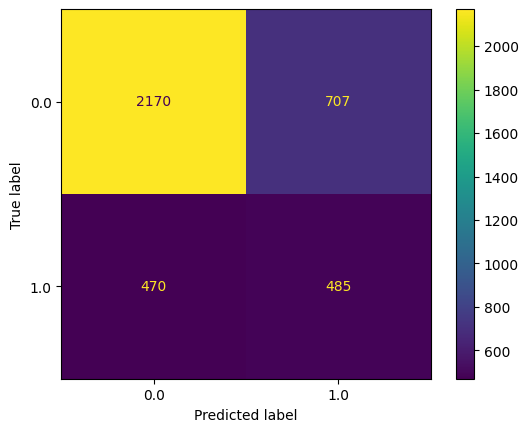

In [57]:
ConfusionMatrixDisplay.from_estimator( model_knn, x_test_new_new, y_test)

### SVC

In [58]:
model_svc.fit(x_train_balanced,y_train_balanced)

SVC(random_state=66)

In [59]:
y_train_predict_svc = model_svc.predict(x_train_balanced)
y_test_predict_svc = model_svc.predict(x_test_new)


In [60]:
print('------Clasification Report svc Train-------')
print(classification_report(y_train_balanced,y_train_predict_svc))

print('')
print('------Clasification Report svc Test-------')
print(classification_report(y_test,y_test_predict_svc))


------Clasification Report svc Train-------
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.73     11504
         1.0       0.73      0.72      0.73     11504

    accuracy                           0.73     23008
   macro avg       0.73      0.73      0.73     23008
weighted avg       0.73      0.73      0.73     23008


------Clasification Report svc Test-------
              precision    recall  f1-score   support

         0.0       0.88      0.74      0.80      2877
         1.0       0.46      0.69      0.55       955

    accuracy                           0.72      3832
   macro avg       0.67      0.71      0.68      3832
weighted avg       0.77      0.72      0.74      3832



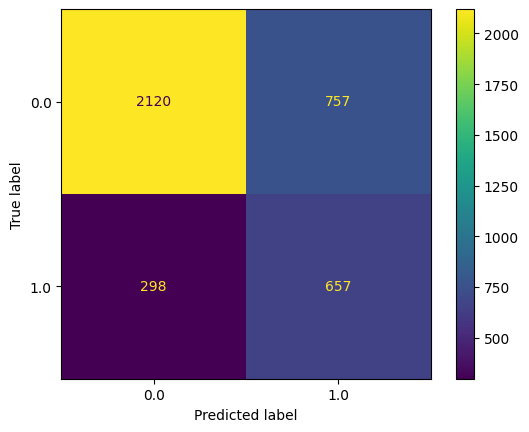

In [61]:
ConfusionMatrixDisplay.from_estimator( model_svc, x_test_new, y_test)

### Decision Tree

In [62]:
model_dt.fit(x_train_balanced,y_train_balanced)

DecisionTreeClassifier(random_state=66)

In [63]:
y_train_predict_dt = model_dt.predict(x_train_balanced)
y_test_predict_dt = model_dt.predict(x_test_new)


In [64]:
print('------Clasification Report Decision Tree Train-------')
print(classification_report(y_train_balanced,y_train_predict_dt))

print('')
print('------Clasification Report Decision Tree Test-------')
print(classification_report(y_test,y_test_predict_dt))


------Clasification Report Decision Tree Train-------
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91     11504
         1.0       0.90      0.93      0.92     11504

    accuracy                           0.91     23008
   macro avg       0.92      0.91      0.91     23008
weighted avg       0.92      0.91      0.91     23008


------Clasification Report Decision Tree Test-------
              precision    recall  f1-score   support

         0.0       0.83      0.75      0.79      2877
         1.0       0.42      0.55      0.48       955

    accuracy                           0.70      3832
   macro avg       0.63      0.65      0.63      3832
weighted avg       0.73      0.70      0.71      3832



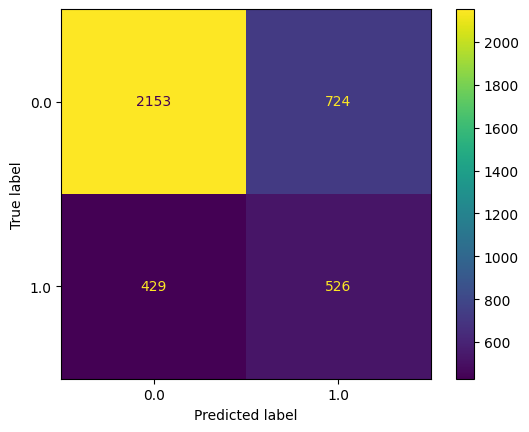

In [65]:
ConfusionMatrixDisplay.from_estimator( model_dt, x_test_new, y_test)

### Random Forest

In [66]:
model_rf.fit(x_train_balanced,y_train_balanced)

RandomForestClassifier(random_state=66)

In [67]:
y_train_predict_rf = model_rf.predict(x_train_balanced)
y_test_predict_rf = model_rf.predict(x_test_new)


In [68]:
print('------Clasification Report Random Forest Train-------')
print(classification_report(y_train_balanced,y_train_predict_rf))

print('')
print('------Clasification Report Random Forest Test-------')
print(classification_report(y_test,y_test_predict_rf))


------Clasification Report Random Forest Train-------
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91     11504
         1.0       0.89      0.95      0.92     11504

    accuracy                           0.91     23008
   macro avg       0.92      0.91      0.91     23008
weighted avg       0.92      0.91      0.91     23008


------Clasification Report Random Forest Test-------
              precision    recall  f1-score   support

         0.0       0.85      0.78      0.82      2877
         1.0       0.48      0.59      0.53       955

    accuracy                           0.74      3832
   macro avg       0.66      0.69      0.67      3832
weighted avg       0.76      0.74      0.75      3832



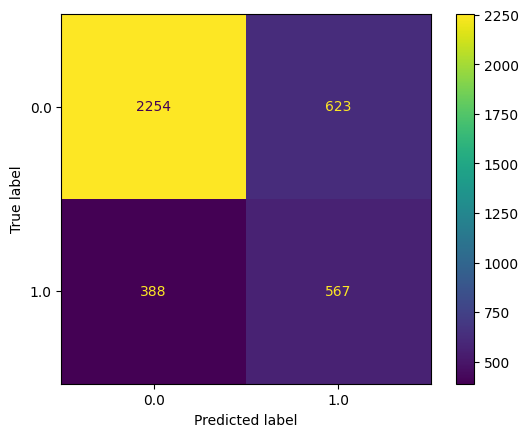

In [69]:
ConfusionMatrixDisplay.from_estimator( model_rf, x_test_new, y_test)

### Ada Boost

In [70]:
model_ada_boost.fit(x_train_balanced,y_train_balanced)

AdaBoostClassifier(random_state=66)

In [71]:
y_train_predict_ada_boost = model_ada_boost.predict(x_train_balanced)
y_test_predict_ada_boost = model_ada_boost.predict(x_test_new)


In [72]:
print('------Clasification Report Ada Boost Train-------')
print(classification_report(y_train_balanced,y_train_predict_ada_boost))

print('')
print('------Clasification Report Ada Boost Test-------')
print(classification_report(y_test,y_test_predict_ada_boost))


------Clasification Report Ada Boost Train-------
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76     11504
         1.0       0.76      0.78      0.77     11504

    accuracy                           0.77     23008
   macro avg       0.77      0.77      0.77     23008
weighted avg       0.77      0.77      0.77     23008


------Clasification Report Ada Boost Test-------
              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82      2877
         1.0       0.50      0.73      0.60       955

    accuracy                           0.75      3832
   macro avg       0.70      0.75      0.71      3832
weighted avg       0.80      0.75      0.77      3832



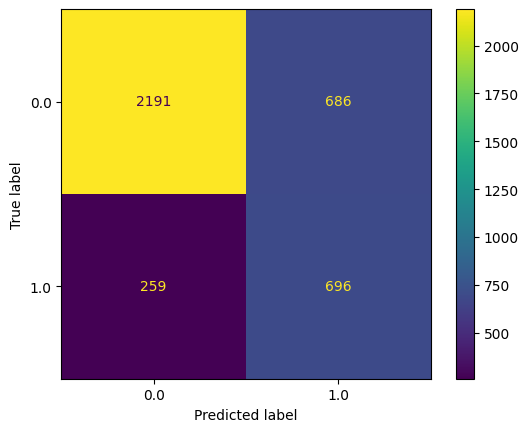

In [73]:
ConfusionMatrixDisplay.from_estimator( model_ada_boost, x_test_new, y_test)

## Cross Validation 

In [75]:
def cross_val (model):

    recall_train_cross_val = cross_val_score(model,
                                        x_train_balanced,
                                        y_train_balanced,
                                        cv=5,
                                        scoring="recall")

    print('----Cross Validation',model,'---- ')
    print('recall Score - All - Cross Validation  : ', recall_train_cross_val)
    print('recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
    print('recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
    print('recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

Cross-validation will be carried out with a CV of 5, and recall scoring will be carried out because the concern point that will be carried out is minimising false negatives. What is meant by false negative is minimising data that is predicted not to resign (0) but, in reality, wants to resign (1).

In [76]:
recall_train_cross_val_knn = cross_val_score(model_knn,
                                        x_train_balanced_new,
                                        y_train_balanced,
                                        cv=5,
                                        scoring="recall")

print('----Cross Validation KNN ---- ')
print('recall Score - All - Cross Validation  : ', recall_train_cross_val_knn)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val_knn.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val_knn.std())
print('recall Score - Range of Test-Set       : ', (recall_train_cross_val_knn.mean()-recall_train_cross_val_knn.std()) , '-', (recall_train_cross_val_knn.mean()+recall_train_cross_val_knn.std()))

----Cross Validation KNN ---- 
recall Score - All - Cross Validation  :  [0.48326814 0.6710126  0.79182964 0.78869565 0.78183399]
recall Score - Mean - Cross Validation :  0.7033280048372164
recall Score - Std - Cross Validation  :  0.11895712746763412
recall Score - Range of Test-Set       :  0.5843708773695823 - 0.8222851323048505


In [77]:
cross_val(model_svc)

----Cross Validation SVC(random_state=66) ---- 
recall Score - All - Cross Validation  :  [0.6644937  0.69274229 0.72794437 0.7226087  0.74054759]
recall Score - Mean - Cross Validation :  0.7096673280048372
recall Score - Std - Cross Validation  :  0.02750357668540056
recall Score - Range of Test-Set       :  0.6821637513194366 - 0.7371709046902378


In [78]:
cross_val(model_dt)

----Cross Validation DecisionTreeClassifier(random_state=66) ---- 
recall Score - All - Cross Validation  :  [0.65840939 0.70360713 0.87136028 0.88       0.88570187]
recall Score - Mean - Cross Validation :  0.7998157322903084
recall Score - Std - Cross Validation  :  0.0981594797846689
recall Score - Range of Test-Set       :  0.7016562525056396 - 0.8979752120749773


In [79]:
cross_val(model_rf)

----Cross Validation RandomForestClassifier(random_state=66) ---- 
recall Score - All - Cross Validation  :  [0.69361147 0.75228162 0.88700565 0.89913043 0.89222077]
recall Score - Mean - Cross Validation :  0.824849989607543
recall Score - Std - Cross Validation  :  0.08533399096455067
recall Score - Range of Test-Set       :  0.7395159986429923 - 0.9101839805720936


In [80]:
cross_val(model_ada_boost)

----Cross Validation AdaBoostClassifier(random_state=66) ---- 
recall Score - All - Cross Validation  :  [0.698392   0.74750109 0.79661017 0.80347826 0.82268579]
recall Score - Mean - Cross Validation :  0.7737334618218922
recall Score - Std - Cross Validation  :  0.04509745004092412
recall Score - Range of Test-Set       :  0.728636011780968 - 0.8188309118628163


From the cross-validation process, the best model will be chosen, namely SVC and Adaboost. This is because the recall-score value of this model is the best of the three other models.

## HyperParameterTuning 

### AdaBoost

In [82]:
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator': [None, DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}


In [83]:
grid_search_ada = GridSearchCV(estimator=model_ada_boost, param_grid=param_grid_ada, cv=5, scoring='recall', n_jobs=-1)

In [84]:
grid_search_ada.fit(x_train_balanced,y_train_balanced)

/Users/harari/miniconda3/envs/hck7/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/harari/miniconda3/envs/hck7/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/harari/miniconda3/envs/hck7/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/harari/miniconda3/envs/hck7/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/harari/miniconda3/envs/hck7/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estima

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=66), n_jobs=-1,
             param_grid={'base_estimator': [None,
                                            DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

In [85]:
print("Hyperparameter Terbaik:", grid_search_ada.best_params_)
print("Akurasi Terbaik:", grid_search_ada.best_score_)

Hyperparameter Terbaik: {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.1, 'n_estimators': 200}
Akurasi Terbaik: 0.8217190257543978


After hyperparameter tuning, it was found that the best parameters for boost are:
  - 'base_estimator': DecisionTreeClassifier(max_depth=2)
  - 'learning_rate': 0.1
  - 'n_estimators': 200

In [86]:
model_ada_boost_best = grid_search_ada.best_estimator_

In [87]:
y_train_predict_ada_boost_best = model_ada_boost_best.predict(x_train_balanced)
y_test_predict_ada_boost_best = model_ada_boost_best.predict(x_test_new)


In [88]:
print('------Clasification Report Ada Boosting Best Train-------')
print(classification_report(y_train_balanced,y_train_predict_ada_boost_best))

print('')
print('------Clasification Report Ada Boosting Best Test-------')
print(classification_report(y_test,y_test_predict_ada_boost_best))


------Clasification Report Ada Boosting Best Train-------
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79     11504
         1.0       0.77      0.83      0.80     11504

    accuracy                           0.79     23008
   macro avg       0.80      0.79      0.79     23008
weighted avg       0.80      0.79      0.79     23008


------Clasification Report Ada Boosting Best Test-------
              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82      2877
         1.0       0.51      0.73      0.60       955

    accuracy                           0.75      3832
   macro avg       0.70      0.75      0.71      3832
weighted avg       0.80      0.75      0.77      3832



### SVC

In [92]:
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] 
}

In [93]:
grid_search_svc = GridSearchCV(estimator=model_svc, param_grid=param_grid_svc, cv=5, scoring='recall', n_jobs=-1)

In [94]:
grid_search_svc.fit(x_train_balanced,y_train_balanced)

GridSearchCV(cv=5, estimator=SVC(random_state=66), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='recall')

In [95]:
print("Hyperparameter Terbaik:", grid_search_svc.best_params_)
print("Akurasi Terbaik:", grid_search_svc.best_score_)

Hyperparameter Terbaik: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Akurasi Terbaik: 0.7564334221416018


After hyperparameter tuning, it was found that the best parameters for SVC were as follows:
- 'C': 0.1
- 'gamma': 'auto'
- 'kernel': 'poly'

In [96]:
model_svc_best = grid_search_svc.best_estimator_

In [97]:
y_train_predict_svc_best = model_svc_best.predict(x_train_balanced)
y_test_predict_svc_best = model_svc_best.predict(x_test_new)


In [98]:
print('------Clasification Report SVC Best Train-------')
print(classification_report(y_train_balanced,y_train_predict_svc_best))

print('')
print('------Clasification Report Ada Boosting Best Test-------')
print(classification_report(y_test,y_test_predict_svc_best))


------Clasification Report SVC Best Train-------
              precision    recall  f1-score   support

         0.0       0.71      0.60      0.65     11504
         1.0       0.65      0.76      0.70     11504

    accuracy                           0.68     23008
   macro avg       0.68      0.68      0.68     23008
weighted avg       0.68      0.68      0.68     23008


------Clasification Report Ada Boosting Best Test-------
              precision    recall  f1-score   support

         0.0       0.87      0.59      0.70      2877
         1.0       0.37      0.74      0.49       955

    accuracy                           0.62      3832
   macro avg       0.62      0.66      0.60      3832
weighted avg       0.75      0.62      0.65      3832



## Kesimpulan Model 

In [90]:
#membuat table baru default untuk nantinya membandingkan dengan nilai f1 score test yang default dan yang sudah dengan menggunakan random seach
all_reports_ada_boost = {}
def performance_report(all_reports_ada_boost, y_train_balanced, y_train_predict_ada_boost, y_test, y_test_predict_ada_boost, name):
  score_reports = {
      'train - precision' : precision_score(y_train_balanced, y_train_predict_ada_boost),
      'train - recall' : recall_score(y_train_balanced, y_train_predict_ada_boost),
      'train - accuracy' : accuracy_score(y_train_balanced, y_train_predict_ada_boost),
      'train - f1_score' : f1_score(y_train_balanced, y_train_predict_ada_boost),
      'test - precision' : precision_score(y_test, y_test_predict_ada_boost),
      'test - recall' : recall_score(y_test, y_test_predict_ada_boost),
      'test - accuracy_score' : accuracy_score(y_test, y_test_predict_ada_boost),
      'test - f1_score' : f1_score(y_test, y_test_predict_ada_boost),
  }
  all_reports_ada_boost[name] = score_reports
  return all_reports_ada_boost

all_reports_ada_boost = performance_report(all_reports_ada_boost, y_train_balanced, y_train_predict_ada_boost, y_test, y_test_predict_ada_boost, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports_ada_boost)

all_reports_ada_boost = performance_report(all_reports_ada_boost, y_train_balanced, y_train_predict_ada_boost_best, y_test, y_test_predict_ada_boost_best, 'After HyperParameter Tuning')
pd.DataFrame(all_reports_ada_boost)

,Baseline (Default Hyperparameter),After HyperParameter Tuning
train - precision,0.759654,0.774126
train - recall,0.778077,0.831189
train - accuracy,0.765951,0.794332
train - f1_score,0.768755,0.801643
test - precision,0.503618,0.505080
test - recall,0.728796,0.728796
test - accuracy_score,0.753392,0.754436
test - f1_score,0.595635,0.596657


In [99]:
#membuat table baru default untuk nantinya membandingkan dengan nilai f1 score test yang default dan yang sudah dengan menggunakan random seach
all_reports_svc = {}
def performance_report(all_reports_svc, y_train_balanced, y_train_predict_svc, y_test, y_test_predict_svc, name):
  score_reports = {
      'train - precision' : precision_score(y_train_balanced, y_train_predict_svc),
      'train - recall' : recall_score(y_train_balanced, y_train_predict_svc),
      'train - accuracy' : accuracy_score(y_train_balanced, y_train_predict_svc),
      'train - f1_score' : f1_score(y_train_balanced, y_train_predict_svc),
      'test - precision' : precision_score(y_test, y_test_predict_svc),
      'test - recall' : recall_score(y_test, y_test_predict_svc),
      'test - accuracy_score' : accuracy_score(y_test, y_test_predict_svc),
      'test - f1_score' : f1_score(y_test, y_test_predict_svc),
  }
  all_reports_svc[name] = score_reports
  return all_reports_svc

all_reports_svc = performance_report(all_reports_svc, y_train_balanced, y_train_predict_svc, y_test, y_test_predict_svc, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports_svc)

all_reports_svc = performance_report(all_reports_svc, y_train_balanced, y_train_predict_svc_best, y_test, y_test_predict_svc_best, 'After HyperParameter Tuning')
pd.DataFrame(all_reports_svc)

,Baseline (Default Hyperparameter),After HyperParameter Tuning
train - precision,0.733622,0.653858
train - recall,0.721314,0.761735
train - accuracy,0.729703,0.679242
train - f1_score,0.727416,0.703686
test - precision,0.464639,0.372487
test - recall,0.687958,0.737173
test - accuracy_score,0.724687,0.625000
test - f1_score,0.554664,0.494903


From these two models, the best model will be chosen, namely the SVC model after hyperparameter tuning. Reasons why we chose SVC as the best model:

- A score value that is above 0.7 indicates that the model is quite capable of predicting a problem.
- This model is almost the best fit; the value of recall in the train for this SVC is 0.76, while for the test it is 0.73. In this way, this model can be considered the best fit because it only has a small difference, namely 0.03.

# VII. Model Saving 

In [102]:
with open('pipeline.pkl', 'wb') as file_1:
  pickle.dump(final, file_1)

with open('model_svc_best.pkl', 'wb') as file_2:
  pickle.dump(model_svc_best, file_2)

with open('list_num_columns.txt', 'w') as file_3:
  file_3.write(str(korelasi_num))

with open('list_cat_columns.txt', 'w') as file_4:
  file_4.write(str(korelasi_cat))

# VIII. Model Inference

The Inference Model is found in another notebook

# IX. Conclusion 

1. So in this project, the columns that have correlation and will be used in modelling are:
- 'city_development_index'
- 'gender'
- 'relevent_experience'
- 'enrolled_university'
- 'education_level'
- 'major_discipline'
- 'company_size'
- 'company_type'
- 'last_new_job'
- 'experience_category'

2. Based on testing and trial and error, it was found that the best model to complete this project is the SVC model, which has been hyperparameter tuned. The SVM model used in this project is considered almost the best fit because the recall value for the train and test data is only 0.03 different. The recall value on the train data is 0.76, while the recall value on the test data is 0.73. Below are the best parameters of this SVC model for this project:
- 'C': 0.1
- 'gamma': 'auto'
- 'kernel': 'poly'

3. Advantages and disadvantages of the model used:

A. Advantages
- This SVC model is almost close to best fit because the recall values in the test and train data are not much different.
- In theory, this model is very good for many features.
B. Disadvantages
- The recall level is still at 0.73, indicating that this model cannot be said to be a model that predicts accurately. Because, in my opinion, a really good model is one that can produce a score above 0.9. Therefore, it is possible to improve the model; the training data must be better and the missing values reduced.

- This SVC model takes quite a lot of time to train.
4. Companies should pay attention to workers who are at risk of resigning and have the following characteristics:
- Bachelor's degree
- Junior level experience
- Are new employees (under one year)